In [75]:
import pulp as p
# import numpy as np
# import matplotlib.pyplot as plt

# Define problem

In [76]:
Lpp = p.LpProblem('Car Factory', p.LpMaximize)
A = p.LpVariable('Car A',lowBound=0,cat=LpInteger)     #  A = [ 0,∞ )
B = p.LpVariable('Car B',lowBound=0,cat=LpInteger)     #  B = [ 0,∞ )

### Objective Function

In [77]:
Lpp += 20000*A + 45000*B

### Constraints

In [78]:
Lpp += 4*A+ 5*B <= 30
Lpp += 3*A + 6*B <= 30
Lpp += 2*A + 7*B <= 30

In [79]:
Lpp

Car_Factory:
MAXIMIZE
20000*Car_A + 45000*Car_B + 0
SUBJECT TO
_C1: 4 Car_A + 5 Car_B <= 30

_C2: 3 Car_A + 6 Car_B <= 30

_C3: 2 Car_A + 7 Car_B <= 30

VARIABLES
0 <= Car_A Integer
0 <= Car_B Integer

# Solving 

In [81]:
status = Lpp.solve()
status 

1

# Printing Results

In [83]:
print("Number of Car A Made: ", A.varValue)
print("Number of Car B Made: ", B.varValue)
print("Total Profit: ", p.value(Lpp.objective))
# print("Current Status: ", LpStatus[Lpp.status])

Number of Car A Made:  1.0
Number of Car B Made:  4.0
Total Profit:  200000.0


# Plotting

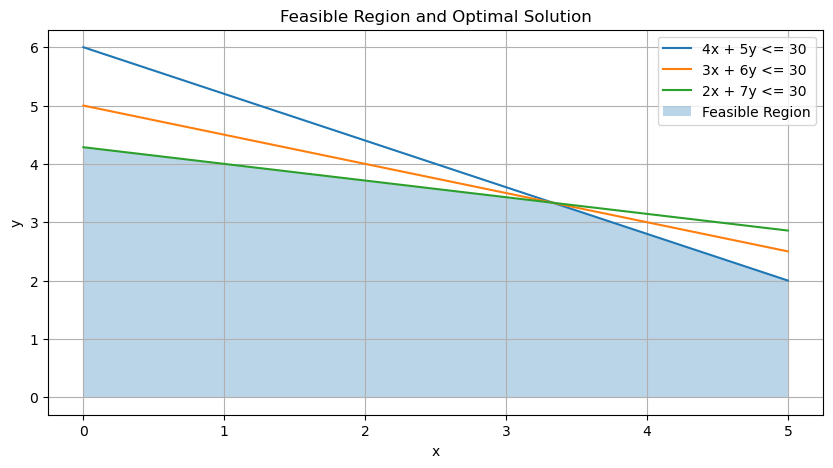

In [84]:
x_values = np.linspace(0, 5, 10)
y1 = (30 - 4*x_values)/5
y2 = (30 - 3*x_values)/6
y3 = (30 - 2*x_values)/7

plt.figure(figsize=(10,5))
plt.plot(x_values, y1, label="4x + 5y <= 30")
plt.plot(x_values, y2, label="3x + 6y <= 30")
plt.plot(x_values, y3, label="2x + 7y <= 30")

plt.fill_between(x_values, 0, np.minimum.reduce([y1, y2, y3]), alpha=0.3, label='Feasible Region')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region and Optimal Solution')
plt.legend()

plt.grid(True)
plt.show()